# L&S Final Project: Visualizing Neural Networks

In [1]:
# importing packages
import os

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2024-03-26 12:55:28.861466: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# from keras.applications.vgg16 import VGG16

2024-03-26 00:01:35.440439: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# model = VGG16(weights='imagenet')
# print

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x15fda7990>>


In [14]:
# image = cv2.resize(cv2.imread('./face_data/training_fake/easy_1_1110.jpg'), (224, 224), interpolation=cv2.INTER_AREA)

In [15]:
image = np.expand_dims(image, axis=0)

In [16]:
image.shape

(1, 224, 224, 3)

In [17]:
features = model.predict(image)

: 

In [3]:
import random

def shuffle_together(array1, array2):
  """Shuffles two arrays of the same length in the same order.

  Args:
      array1 (list): The first array.
      array2 (list): The second array.

  Returns:
      tuple: A tuple containing the shuffled arrays (array1, array2).
  """

  if len(array1) != len(array2):
    raise ValueError("Arrays must have the same length.")

  shuffled_pairs = list(zip(array1, array2))
  random.shuffle(shuffled_pairs)
  shuffled_array1, shuffled_array2 = zip(*shuffled_pairs)

  return np.array(shuffled_array1), np.array(shuffled_array2)

In [4]:
# loading in the data
fake_folder = './face_data/training_fake'
real_folder = './face_data/training_real'
fake = [cv2.resize(cv2.imread(fake_folder + "/" + name), (224, 224), interpolation=cv2.INTER_AREA) for name in os.listdir(fake_folder)]
real = [cv2.resize(cv2.imread(real_folder + "/" + name), (224, 224), interpolation=cv2.INTER_AREA) for name in os.listdir(real_folder)]

# splitting data
X_train = fake[:769] + real[:865]
X_test = fake[769:] + real[865:]

# generating labels for data
y_train = np.append(np.ones(769),  np.zeros(865))
y_test = np.append(np.ones(191), np.zeros(216))

In [5]:
# shuffling the data
X_train, y_train = shuffle_together(X_train, y_train)

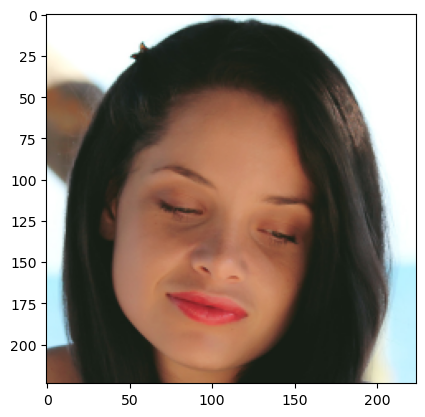

In [9]:
# plotting the an example image
plt.imshow(cv2.cvtColor(X_train[0], cv2.COLOR_BGR2RGB))


In [8]:
# Define the model
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Final layer with 1 neuron and sigmoid activation

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
y_train = y_train.astype(int)
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [10]:
X_train = X_train / 255.0
X_train

array([[[[0.16862745, 0.14901961, 0.14509804],
         [0.16862745, 0.14901961, 0.14509804],
         [0.15294118, 0.1372549 , 0.13333333],
         ...,
         [0.21960784, 0.23529412, 0.32941176],
         [0.22352941, 0.23921569, 0.33333333],
         [0.21960784, 0.23529412, 0.33333333]],

        [[0.17254902, 0.15294118, 0.14901961],
         [0.16862745, 0.14901961, 0.14509804],
         [0.16470588, 0.14901961, 0.14509804],
         ...,
         [0.21176471, 0.22745098, 0.3254902 ],
         [0.21176471, 0.22745098, 0.32156863],
         [0.22352941, 0.23921569, 0.3372549 ]],

        [[0.16862745, 0.14509804, 0.14901961],
         [0.16470588, 0.14117647, 0.14509804],
         [0.16862745, 0.14901961, 0.15294118],
         ...,
         [0.21568627, 0.23137255, 0.32941176],
         [0.21568627, 0.23137255, 0.3254902 ],
         [0.20784314, 0.22352941, 0.31764706]],

        ...,

        [[0.06666667, 0.06666667, 0.06666667],
         [0.05098039, 0.05098039, 0.05098039]

In [11]:
model.fit(X_train, y_train, epochs=10)  # Adjust epochs as needed


Epoch 1/10


: 

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)